# Pylväskaavioita

Seuraavassa keskityn ainoastaan kaavioiden laatimiseen ja viimeistelyyn. Taulukoiden viimeistely on tekemättä mikäli se ei vaikuta kaavioon. Kaavioiden lähteenä käytettävien taulukoiden laskennan ja viimeistelyn olen selittänyt toisaalla: https://github.com/taanila/tilastoapu/blob/master/lkm.ipynb

Pääsäännöt:
<ul><li>Lasken dataframe-muotoisen yhteenvetotaulukon.</li>
    <li>Laadin kaavion <b>plot</b>-komennolla dataframesta.</li>
    <li>Joitain muotoilu-/lisäasetuksia annan plot-komennon parametreina.</li>
    <li>Sijoitan kaavion <b>Axes</b>-luokan olion arvoksi.</li>
    <li>Muotoilen kaaviota Axes-luokan olion kautta.</li></ul>


In [1]:
import pandas as pd

#Keskeinen kirjasto kaavioiden luomiseen:
import matplotlib.pyplot as plt

#Tämän ansiosta kaaviot tulostuvat ilman erillisiä tulostuskomentoja:
%matplotlib inline

#Tämä vaikuttaa kaavioiden ulkonäköön:
plt.style.use('seaborn-whitegrid')

In [2]:
#Avaan datan dataframeen.
#Vanhemmissa pandas-versioissa pitää käyttää sheet_name sijasta sheetname.
df = pd.read_excel('http://taanila.fi/data1.xlsx', sheet_name = 'Data')

#Tulostan viisi ensimmäistä riviä:
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
#Muutamia listoja jatkoa varten:
koulutus = ['Peruskoulu','2.aste','Korkeakoulu','Ylempi korkeakoulu']
mielipideasteikko = ['Erittäin tyytymätön','Tyytymätön','Neutraali',
          'Tyytyväinen','Erittäin tyytyväinen']
tyytyväisyydet = ['Johtoon','Työtovereihin','Työympäristöön','Palkkaan','Työtehtäviin']
monivalinnat = ['Kuntosali','Lomaosake','Hieroja','Työterveyshuolto']

In [4]:
#Frekvenssitaulukko koulutukselle:
df1 = df['koulutus'].value_counts(sort = False).to_frame()
df1.index = koulutus
n=df1['koulutus'].sum()
df1['%'] = df1['koulutus'] / n * 100
df1

,koulutus,%
Peruskoulu,27,33.333333
2.aste,30,37.037037
Korkeakoulu,22,27.160494
Ylempi korkeakoulu,2,2.469136


[Text(0, 0, '0 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '40 %')]

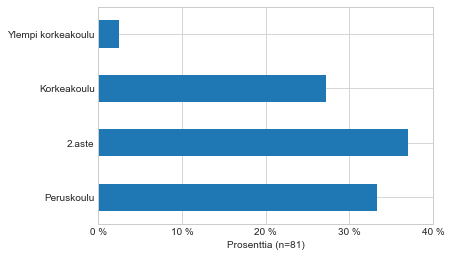

In [5]:
#Koulutusten frekvenssiprosentit pylväinä:
ax1=df1['%'].plot.barh(color='C0')

#Prosenttien yhteydessä tarvitaan n-arvo (mistä lukumäärästä prosentit laskettu?).
ax1.set_xlabel('Prosenttia (n='+str(n)+')')

#Luvun ja prosenttimerkin väliin tulee suomen kielessä välilyönti.
ax1.set_xticks([0,10,20,30,40])
ax1.set_xticklabels(['0 %','10 %','20 %','30 %','40 %'])

In [6]:
#Ikäluokkien frekvenssit:
df3 = df['ikä'].value_counts(sort = False, bins = [20,29,39,49,59,70]).to_frame()
df3

,ikä
"(19.999, 29.0]",17
"(29.0, 39.0]",30
"(39.0, 49.0]",23
"(49.0, 59.0]",11
"(59.0, 70.0]",1


Text(0, 0.5, 'Lukumäärä')

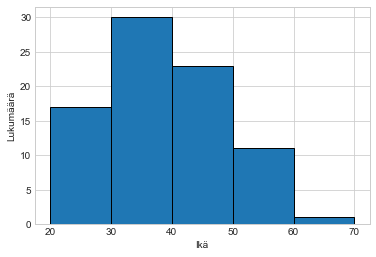

In [7]:
#Historgrammin ikäluokittain voin tehdä suoraan alkuperäisestä aineistosta.
#Ikäluokat samat kuin yllä lasketussa taulukossa: [20,30); [30,40); [40,40); [50,60); [60,70].
ax3=df['ikä'].plot.hist(bins=[20,30,40,50,60,70], edgecolor='black')

ax3.set_xlabel('Ikä')
ax3.set_ylabel('Lukumäärä')

C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


[Text(0, 0, '0 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '80 %'),
 Text(0, 0, '100 %'),
 Text(0, 0, '120 %')]

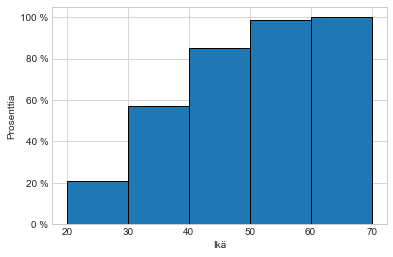

In [8]:
#Histogrammin voin esittää myös kumulatiivisena.
#Normed-parametrilla lukumäärät näytetään prosentteina.
ax4=df['ikä'].plot.hist(cumulative=True, bins=[20,30,40,50,60,70], normed=1, edgecolor='black')

ax4.set_xlabel('Ikä')
ax4.set_ylabel('Prosenttia')

#Prosenttien ulkoasun muotoilu vaatii omat kikkailunsa:
vals = ax4.get_yticks()
ax4.set_yticklabels(['{:.0f} %'.format(y*100) for y in vals])

In [9]:
#Monivalintakysymyksen valintojen lukumäärät suuruusjärjestyksessä:
df5 = df[['työterv','lomaosa','kuntosa','hieroja']].sum().sort_values(ascending = True).to_frame()
df5 = df5.rename(columns = {0: 'Lkm'})
df5.index=monivalinnat
df5

,Lkm
Kuntosali,9.0
Lomaosake,20.0
Hieroja,22.0
Työterveyshuolto,47.0


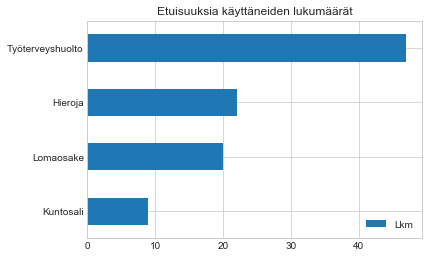

In [10]:
#Taulukon alin arvo näkyy aina vaakapylväskaaviossa ylimpänä pylväänä.
ax5=df5.plot.barh(title='Etuisuuksia käyttäneiden lukumäärät')

In [11]:
#Sukupuolen ja koulutuksen ristiintaulukointi:
df6 = pd.crosstab(df['koulutus'], df['sukup'])
df6.index = koulutus
df6.columns = ['Mies','Nainen']
df6

,Mies,Nainen
Peruskoulu,22,5
2.aste,23,7
Korkeakoulu,15,7
Ylempi korkeakoulu,2,0


Text(0.5, 0, 'Lukumäärä')

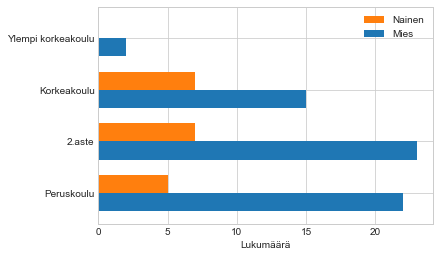

In [12]:
#Ristiintaulukointi pylväinä:
# -width vaikuttaa pylväiden paksuuteen
# -legend='reverse' vaihtaa selitteen järjestyksen.
ax6=df6.plot.barh(width=0.7, legend='reverse')

ax6.set_xlabel('Lukumäärä')

In [13]:
#Ristiintaulukointi prosentteina:
df7 = pd.crosstab(df['koulutus'], df['sukup'], margins = True, normalize = 'columns')
df7.index = koulutus
df7.columns = ['Mies','Nainen','Yhteensä']
df7

,Mies,Nainen,Yhteensä
Peruskoulu,0.354839,0.263158,0.333333
2.aste,0.370968,0.368421,0.370370
Korkeakoulu,0.241935,0.368421,0.271605
Ylempi korkeakoulu,0.032258,0.000000,0.024691


[Text(0, 0, '0 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '80 %'),
 Text(0, 0, '100 %'),
 Text(0, 0, '120 %')]

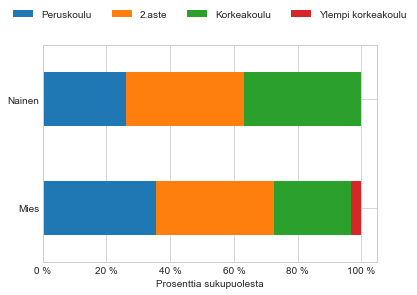

In [14]:
#transpose() vaihtaa arvosarjat ja luokat keskenään.
#stacked=True tarkoittaa pinottua kaaviota.
ax7=df7[['Mies','Nainen']].transpose().plot.barh(stacked=True)

ax7.set_xlabel('Prosenttia sukupuolesta')

#Selitteen asettaminen sopivaan kohtaan on konstikasta.
#ncol=4 laittaa kaikkien neljän värin selitteet vierekkäin.
ax7.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)

#Prosenttien ulkoasun muotoilu vaatii omat kikkailunsa:
vals = ax7.get_xticks()
ax7.set_xticklabels(['{:.0f} %'.format(x*100) for x in vals])

In [15]:
#Monivalinnan vaihtoehtojen lukumäärät sukupuolen mukaan:
df9 = df.groupby('sukup')['työterv','lomaosa','kuntosa','hieroja'].sum()
df9.index = ['Mies','Nainen']
df9.columns=monivalinnat
df9

,Kuntosali,Lomaosake,Hieroja,Työterveyshuolto
Mies,35.0,16.0,8.0,13.0
Nainen,12.0,4.0,1.0,9.0


Text(0, 0.5, 'Lukumäärä')

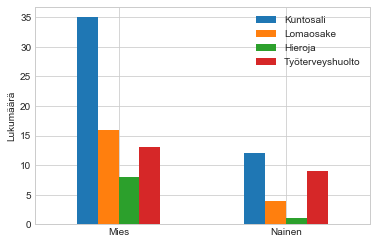

In [16]:
#rot=0 kääntää x-akselin otsikot (Mies, Nainen) vaakasuoraan.
ax9 = df9.plot.bar(rot=0)

ax9.set_ylabel('Lukumäärä')

In [17]:
#Prosentit sukupuolesta:
df10 = df.groupby('sukup')['työterv','lomaosa','kuntosa','hieroja'].sum()
df10.columns = monivalinnat
miehet = df['sukup'].value_counts()[1]
naiset = df['sukup'].value_counts()[2]
df10.iloc[0] = df10.iloc[0] / miehet
df10.iloc[1] = df10.iloc[1] / naiset
df10.index = ['Mies, n=' + str(miehet) ,'Nainen, n=' + str(naiset)]
df10

,Kuntosali,Lomaosake,Hieroja,Työterveyshuolto
"Mies, n=63",0.555556,0.253968,0.126984,0.206349
"Nainen, n=19",0.631579,0.210526,0.052632,0.473684


[Text(0, 0, '0 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '50 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '70 %')]

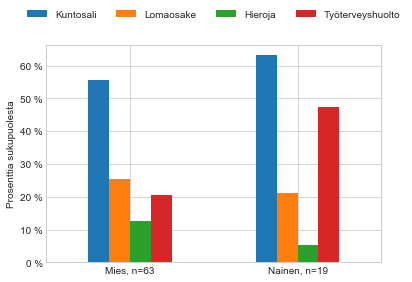

In [18]:
#Edellinen pylväinä:
ax10 = df10.plot.bar(rot=0)

ax10.set_ylabel('Prosenttia sukupuolesta')
ax10.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)

vals = ax10.get_yticks()
ax10.set_yticklabels(['{:.0f} %'.format(x*100) for x in vals])

[Text(0, 0, '0 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '50 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '70 %')]

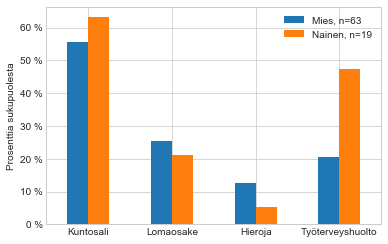

In [19]:
#Edellinen arvosarjojen ja luokkien vaihdon jälkeen:
ax10=df10.transpose().plot.bar(rot=0)

ax10.set_ylabel('Prosenttia sukupuolesta')

vals = ax10.get_yticks()
ax10.set_yticklabels(['{:.0f} %'.format(x*100) for x in vals])

In [20]:
#Koontitaulukko tyytyväisyyksistä:
df11=df['johto'].value_counts(sort = False).to_frame()
df11['työtov'] = df['työtov'].value_counts(sort = False)
df11['työymp'] = df['työymp'].value_counts(sort = False)
df11['palkkat'] = df['palkkat'].value_counts(sort = False)
df11['työteht'] = df['työteht'].value_counts(sort = False)
df11.index = mielipideasteikko
df11.columns = tyytyväisyydet
df11

,Johtoon,Työtovereihin,Työympäristöön,Palkkaan,Työtehtäviin
Erittäin tyytymätön,7,NaN,9,33,5
Tyytymätön,16,3.0,9,19,15
Neutraali,30,16.0,30,19,29
Tyytyväinen,23,35.0,23,10,25
Erittäin tyytyväinen,6,27.0,11,1,8


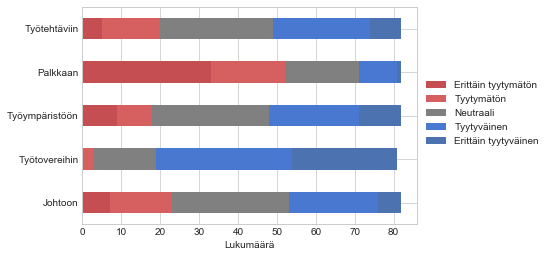

In [21]:
ax11=df11.transpose().plot.barh(stacked=True, color=['#C44E52','#D65F5F','grey','#4878CF','#4C72B0'])

ax11.set_xlabel('Lukumäärä')
ax11.legend(bbox_to_anchor=(1, 0.7))

[Text(0, 0, 'Erittäin tyytymätön'),
 Text(0, 0, 'Tyytymätön'),
 Text(0, 0, 'Neutraali'),
 Text(0, 0, 'Tyytyväinen'),
 Text(0, 0, 'Erittäin tyytyväinen')]

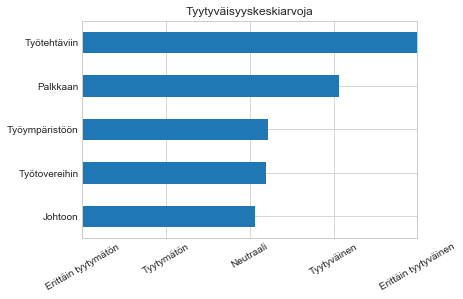

In [22]:
df12=df[['johto','työtov','työymp','palkka','työteht']].mean().sort_values()

ax12=df12.plot.barh(xlim=(1,5), title='Tyytyväisyyskeskiarvoja',color='C0')

ax12.set_xticks([1,2,3,4,5])
ax12.set_yticklabels(tyytyväisyydet)
ax12.set_xticklabels(mielipideasteikko, rotation=30)

Matplotlib mahdollistaa monenlaisia toteutuksia. Seuraavassa laadin viiden kaavion yhdistelmän:
<ul><li>Lisämääreellä <b>subplots=True</b> määritän, että Figure-objektiin sijoitetaan useita kaavioita.</li>
    <li>Lisämääreellä <b>layout=(1,5)</b> määritän, että kaaviot sijoitetaan 1 riville, 5 rinnakkain.</li>
    <li>Lisämääreillä <b>sharex=True</b>, <b>sharey=True</b> määritän, että kaikilla kaavioilla on yhteiset akselit.</li>
    <li>Lisämääreellä <b>figsize=(12,2)</b> määritän kuvion koon.</li>
    <li>Lisämääreellä <b>color='maroon'</b> määritän pylväiden väriksi maroon.</li>
    <li>Lisämääreellä <b>legend=False</b> jätän kaavioista selitteet pois.</li></ul>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002269600E470>,
      dtype=object)

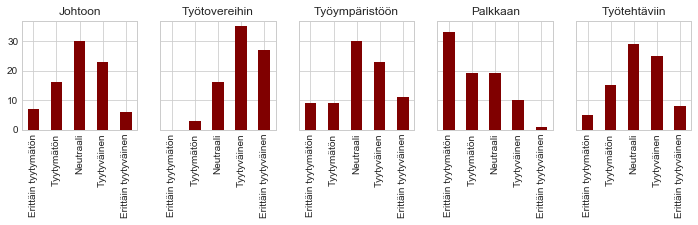

In [23]:
df11.plot.bar(subplots=True, layout=(1,5), sharex=True, sharey=True, 
              figsize=(12,2), color='maroon', legend=False)